Jean has provided a list of files with the shifted filter transmissions, and modified transmissions for the bad `r` (`fluxes.fits`), and catalogs with the sources, and a column per each alteration of the `r` filter (`fluxes_COSMOS15_*.fits`).

So, need to create a copy of the input catalog (\_test) adding per each of the altered column (shift0...shift9, skewed...), the mean wavelength of the filters, which can be calculated from `fluxes.fits`.

With the new catalog, we should run nnpz, and get the same result with `r` not shifted and without wavelength mean, and with each of the `r_...` columns and providing the filter mean wavelength.

In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np

In [2]:
fluxes = fits.open('/home/aalvarez/Work/Data/coupon/fluxes.fits')

In [3]:
fluxes.info()

Filename: /home/aalvarez/Work/Data/coupon/fluxes.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  NNPZ_PHOTOMETRY    1 BinTableHDU    110   518404R x 50C   [K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  u             1 BinTableHDU     13   1898R x 2C   [E, E]   
  3  g             1 BinTableHDU     13   799R x 2C   [E, E]   
  4  r             1 BinTableHDU     13   10000R x 2C   [E, E]   
  5  i             1 BinTableHDU     13   799R x 2C   [E, E]   
  6  z             1 BinTableHDU     13   799R x 2C   [E, E]   
  7  vis           1 BinTableHDU     13   900R x 2C   [E, E]   
  8  Y             1 BinTableHDU     13   1800R x 2C   [E, E]   
  9  J             1 BinTableHDU     13   1800R x 2C   [E, E]   
 10  H             1 BinTableHDU     13   1800R x 2C   [E, E]   
 11  r_shift0      1 BinTableHDU  

In [4]:
test = fits.open('/home/aalvarez/Work/Data/coupon/fluxes_COSMOS15_test.fits')

In [5]:
test[1].columns

ColDefs(
    name = 'ID'; format = 'K'
    name = 'u'; format = 'E'
    name = 'g'; format = 'E'
    name = 'r'; format = 'E'
    name = 'i'; format = 'E'
    name = 'z'; format = 'E'
    name = 'vis'; format = 'E'
    name = 'Y'; format = 'E'
    name = 'J'; format = 'E'
    name = 'H'; format = 'E'
    name = 'r_shift0'; format = 'E'
    name = 'r_shift1'; format = 'E'
    name = 'r_shift2'; format = 'E'
    name = 'r_shift3'; format = 'E'
    name = 'r_shift4'; format = 'E'
    name = 'r_shift5'; format = 'E'
    name = 'r_shift6'; format = 'E'
    name = 'r_shift7'; format = 'E'
    name = 'r_shift8'; format = 'E'
    name = 'r_shift9'; format = 'E'
    name = 'r_widening0'; format = 'E'
    name = 'r_widening1'; format = 'E'
    name = 'r_widening2'; format = 'E'
    name = 'r_widening3'; format = 'E'
    name = 'r_widening4'; format = 'E'
    name = 'r_widening5'; format = 'E'
    name = 'r_widening6'; format = 'E'
    name = 'r_widening7'; format = 'E'
    name = 'r_widening8'; 

An example of what I was saying. So, for instance, for `r_shift0`, the mean wavelength of the filter tranmission:

In [6]:
mean_r_shift0 = np.average(fluxes['r_shift0'].data['Wavelength'], weights=fluxes['r_shift0'].data['Transmission'])
print(mean_r_shift0)

6199.88


In [7]:
mean_r = np.average(fluxes['r'].data['Wavelength'], weights=fluxes['r'].data['Transmission'])
print(mean_r)

6299.88


In [8]:
# So the shift if
mean_r_shift0 - mean_r

-100.0

In [9]:
# Just for fun
for i in range(10):
    name = f'r_shift{i}'
    transmission = fluxes[name].data
    mean_shifted = np.average(transmission['Wavelength'], weights=transmission['Transmission'])
    print(f'{name} shifted {mean_shifted-mean_r}')

r_shift0 shifted -100.0
r_shift1 shifted -77.77783203125
r_shift2 shifted -55.5556640625
r_shift3 shifted -33.33349609375
r_shift4 shifted -11.11083984375
r_shift5 shifted 11.111328125
r_shift6 shifted 33.33349609375
r_shift7 shifted 55.5556640625
r_shift8 shifted 77.77783203125
r_shift9 shifted 100.00048828125


In the usual ph2ref repo there is now a script called [`add-filter-means-wavelength.py`](https://gitlab.astro.unige.ch/aalvarez/ph2ref/blob/master/add-filter-means-wavelength.py) to do this.

Here is a sample of the output catalog

In [10]:
with_filter_means = Table.read('/home/aalvarez/Work/Data/coupon/fluxes_COSMOS15_test_with_means.fits')
with_filter_means.colnames

['ID',
 'u',
 'g',
 'r',
 'i',
 'z',
 'vis',
 'Y',
 'J',
 'H',
 'r_shift0',
 'r_shift1',
 'r_shift2',
 'r_shift3',
 'r_shift4',
 'r_shift5',
 'r_shift6',
 'r_shift7',
 'r_shift8',
 'r_shift9',
 'r_widening0',
 'r_widening1',
 'r_widening2',
 'r_widening3',
 'r_widening4',
 'r_widening5',
 'r_widening6',
 'r_widening7',
 'r_widening8',
 'r_widening9',
 'r_skewing0',
 'r_skewing1',
 'r_skewing2',
 'r_skewing3',
 'r_skewing4',
 'r_skewing5',
 'r_skewing6',
 'r_skewing7',
 'r_skewing8',
 'r_skewing9',
 'r_softening0',
 'r_softening1',
 'r_softening2',
 'r_softening3',
 'r_softening4',
 'r_softening5',
 'r_softening6',
 'r_softening7',
 'r_softening8',
 'r_softening9',
 'ra',
 'dec',
 'z_true',
 'has_spec_z',
 'weight',
 'radius',
 'r_shift7_obs_mag_err',
 'r_widening8_obs_mag',
 'r_skewing9_obs_err',
 'r_softening1_obs_mag',
 'r_softening5_obs',
 'r_softening8_obs_err',
 'r_skewing3_obs_mag_err',
 'r_shift0_obs_mag_err',
 'r_softening9_obs_err',
 'r_skewing8_obs_err',
 'r_shift1_obs_err',


In [11]:
with_filter_means[:5]['r', 'r_shift0', 'r_shift0_mean']

r,r_shift0,r_shift0_mean
float32,float32,float32
6.00605,5.81869,6199.88
42.6332,39.9572,6199.88
226.256,213.619,6199.88
0.177467,0.177353,6199.88
0.0383894,0.0380675,6199.88


Ok, so now should run `nnpz` over this catalog, using `r` without the means, and the modified `r` with the means.
Could do it manually, but...

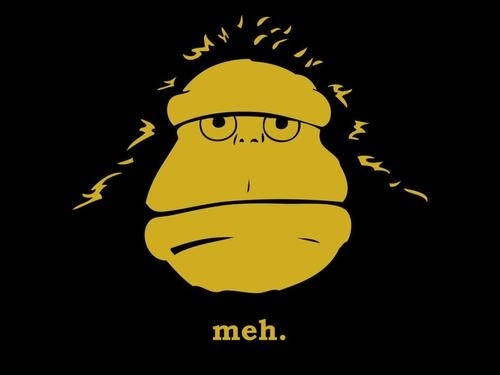

In [12]:
from IPython.display import Image
Image(filename='/home/aalvarez/Pictures/meh.jpg')

We can script its execution, generating a config file on the fly for each possible combination.
We can do the analysis later on this notebook.